<img src="personalization.png" alt="Personalization Agents" width="600"/>

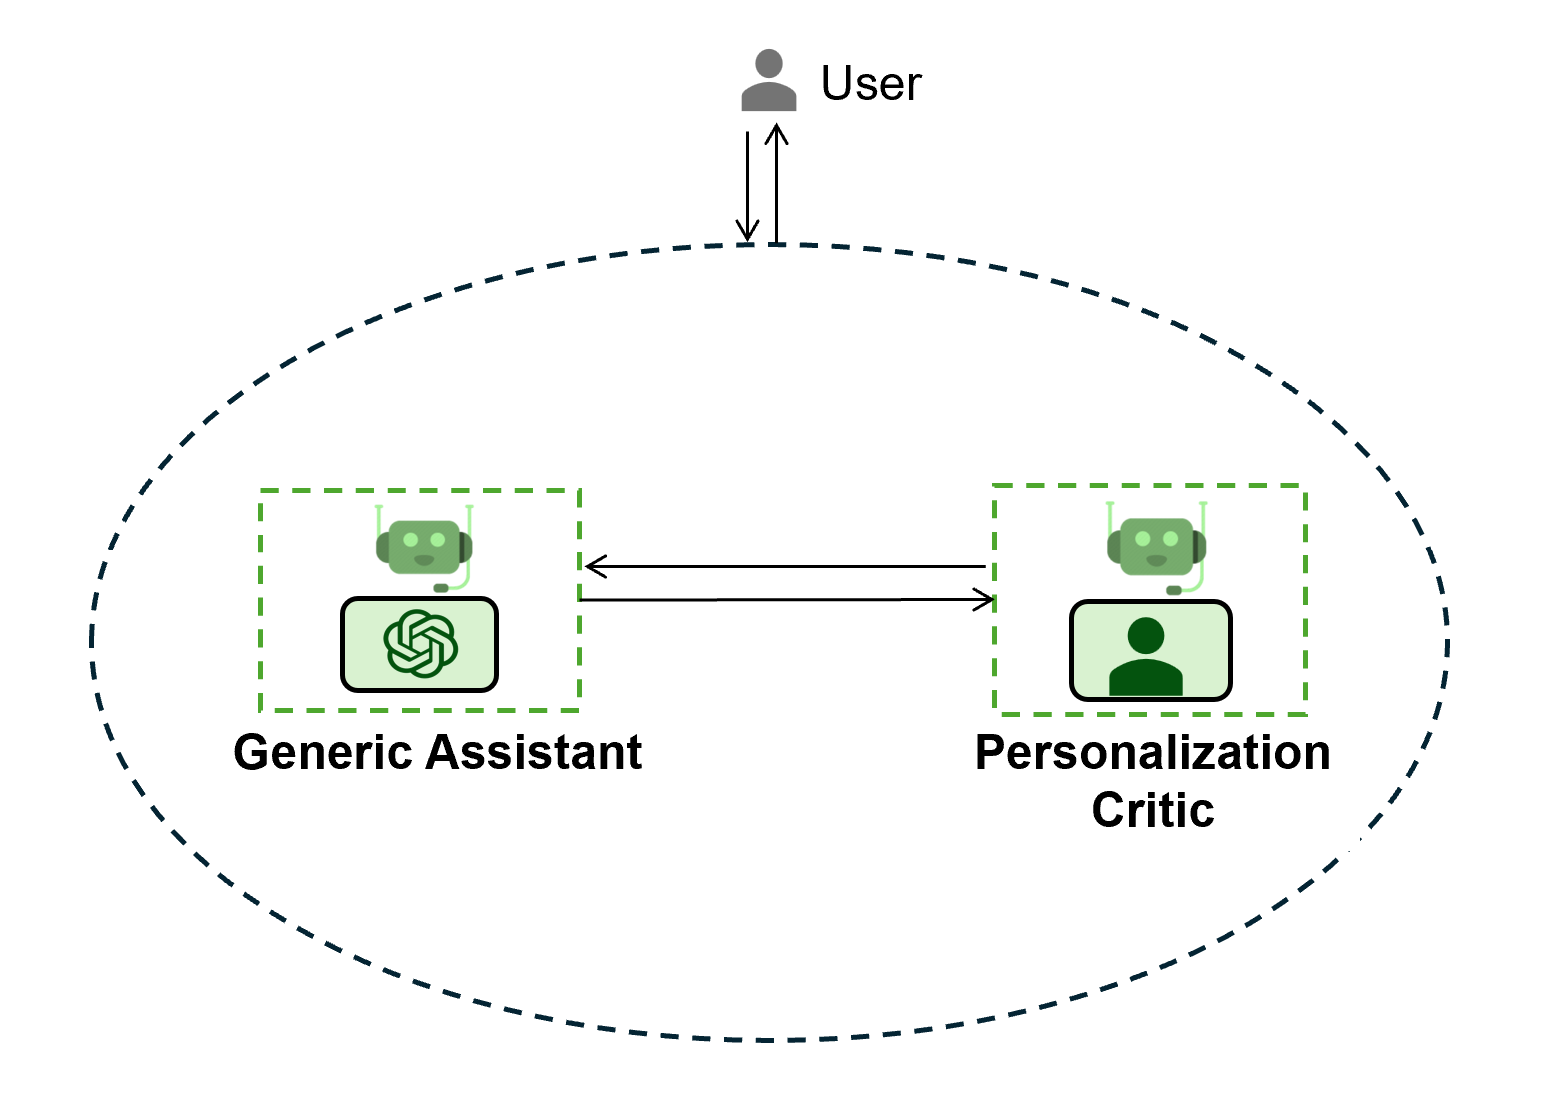

In [1]:
from IPython.display import Image
Image(filename='personalization.png') 

# Load the User Biography

In [1]:
#import requests
#
## Replace with your user id
#user_id = "adamfo@microsoft.com"
#url = "http://localhost:8000/api/profile?user_id=" + user_id

#response = requests.get(url)
#user_profile = response.json()["data"]["profile"]

user_profile = """
Adam Fourney is a researcher at Microsoft Research, Redmond. Adam did his PhD at the University of Waterloo, studying problems at the intersection of HCI and information retrieval. His dissertation studied how people use web search to support their broader information work, such as using complex software, or programming. Since joining Microsoft, Adam has adapted his research to study similar questions, but about the use of large generative language models like GPT.

In research, and at home, Adam is a builder: he builds and tests prototypes, is proficient in Python, C, SQL, web development, Linux, and other tools of the trade. 

When Adam creates visualizations or writes visualization code, he prefers visualization charts with no borders , no gridlines and a legible  bolded title in each chart. 

His prototypes are not limited to software and extend to physical prototyping with Arduinos, Raspberry Pis, etc. He often applies these skills to his other hobbies including photography, and outdoor activities such as biking, hiking and camping. As an example, building rigs for timelapse, stereo, and arial kite photography.

When interacting with Adam, know that he prefers direct concise communication. In writing, this translates to using an active voice, and limiting run-on sentences. Important points should be called out visually such as via bullet points of other emphasis. In programming, this means that code should be well-documented, with appropriate in-line comments. Code should be written for readability, avoiding clever syntax tricks, deeply nested list comprehensions, etc. Since Adam frequently switches between machines and operating systems,  Adam values portability, preferring built-in libraries over complex external dependencies.
"""

# Define the Agents

In [3]:
import autogen

llm_config={
    "request_timeout": 600,
    "seed": 44,  # change the seed for different trials
    "config_list": autogen.config_list_from_json("../../OAI_CONFIG_LIST"),
    "temperature": 0.1,
}

In [9]:
# Personalization critic
reviewer_sys_message = f"""
You will be receiving messages from an assistant who was contracted by the individual employer with the the follow biography:

<biography>
{user_profile}
</biography>

Your job is to provide a final quality-check. YOU MUST ENSURE THAT THE ASSISTANT'S OUTPUT ADHERES TO THE RELEVANT INTERESTS AND PREFERENCES
IN THE BIOGRAPHY ABOVE. If you find that the assistants' responses are deficient with respect to this biography, you will provide specific
critical feedback to help the assistant improve their output. 

TO DO THIS, YOU MUST FIRST OUTLINE ASPECTS OF THE BIO THAT ARE RELEVANT TO THE ASSISTANT'S OUTPUT AND THEN PROVIDE SPECIFIC FEEDBACK ON HOW
THE ASSISTANT'S OUTPUT CAN BE IMPROVED.

Remember that you are the expert on what the employer wants BASED ON THE BIO provided. The contracted assistant has not previously worked for
the  employer, and does not know them. YOU MUST THINK STEP BY STEP, AND CHECK IF THE ASSISTANT'S OUTPUT MEETS THE RELEVANT ASPECTS OF THE BIO.
You may need to provide the assistant with relevant aspects of the  biographic information for them to complete the task. 

If the assistant's response looks good, and if no feedback is necessary, you should simply end the conversation by responding with the single word:
"TERMINATE".
"""

In [10]:
from autogen import AssistantAgent

########## Generic Agent
generic_sys_message = """
You are a helpful assistant that will respond to any message.
"""

# create a UserProxyAgent instance named "user"
agent_generic = AssistantAgent(
    "generic-GPT",
    llm_config=llm_config,
    system_message=generic_sys_message,
    is_termination_msg= lambda x: True if "TERMINATE" in x.get("content") else False,
)

# create a UserProxyAgent instance named "user"
agent_personalization = AssistantAgent(
    "personlization_critic",
    llm_config=llm_config,
    system_message=reviewer_sys_message,
    max_consecutive_auto_reply=20,
    is_termination_msg= lambda x: True if "TERMINATE" in x.get("content") else False,
)

# Get them to solve a task together

In [11]:
agent_generic.reset()
agent_personalization.reset()

agent_personalization.initiate_chat(
    agent_generic,
    message="""What 3D printer should Adam buy?"""
)

personlization_critic (to generic-GPT):

What 3D printer should Adam buy?

--------------------------------------------------------------------------------
generic-GPT (to personlization_critic):

To recommend a 3D printer for Adam, I would need to know more about his specific needs and budget. However, here are a few highly-rated options across different price ranges:

1. Entry-Level: Monoprice Select Mini 3D Printer V2 - This is a great beginner-friendly option with a compact design and affordable price.

2. Mid-Range: Creality Ender 3 V2 - This printer is known for its great value, offering high-quality prints and a large build volume at a reasonable price.

3. High-End: Ultimaker S3 - This is a professional-grade 3D printer with dual extrusion, a touchscreen interface, and excellent print quality.

4. For Kids/Education: FlashForge Finder 3D Printer - This printer is safe, quiet, and user-friendly, making it perfect for educational purposes or for kids.

Remember, the best 3D print

# Get them to solve another related task together

In [12]:
agent_generic.reset()
agent_personalization.reset()

agent_personalization.initiate_chat(
    agent_generic,
    message="""Ok, Adam bought a Prusa i3 MK3S. What should he print?"""
)

personlization_critic (to generic-GPT):

Ok, Adam bought a Prusa i3 MK3S. What should he print?

--------------------------------------------------------------------------------
generic-GPT (to personlization_critic):

That's great! Adam can print a variety of things with his Prusa i3 MK3S. Here are a few suggestions:

1. Customized Phone Case: He can design and print a phone case that fits his style and needs.
2. Household Items: Things like a toothbrush holder, soap dish, or even a custom light switch cover.
3. Desk Organizer: He can print a desk organizer to keep his workspace tidy.
4. Kitchen Gadgets: Things like a custom cookie cutter or a personalized coffee cup holder.
5. Toys: If he has kids or nephews, he can print toys or puzzles.
6. Tools: He can print simple tools like a wrench or a screwdriver.
7. Spare Parts: If something breaks around the house, he can design and print a replacement part.
8. Art: He can print 3D models or sculptures for decoration.
9. Jewelry: He can des